**Jader Stalyn Chinal Atis**

**Cc 1085948736**

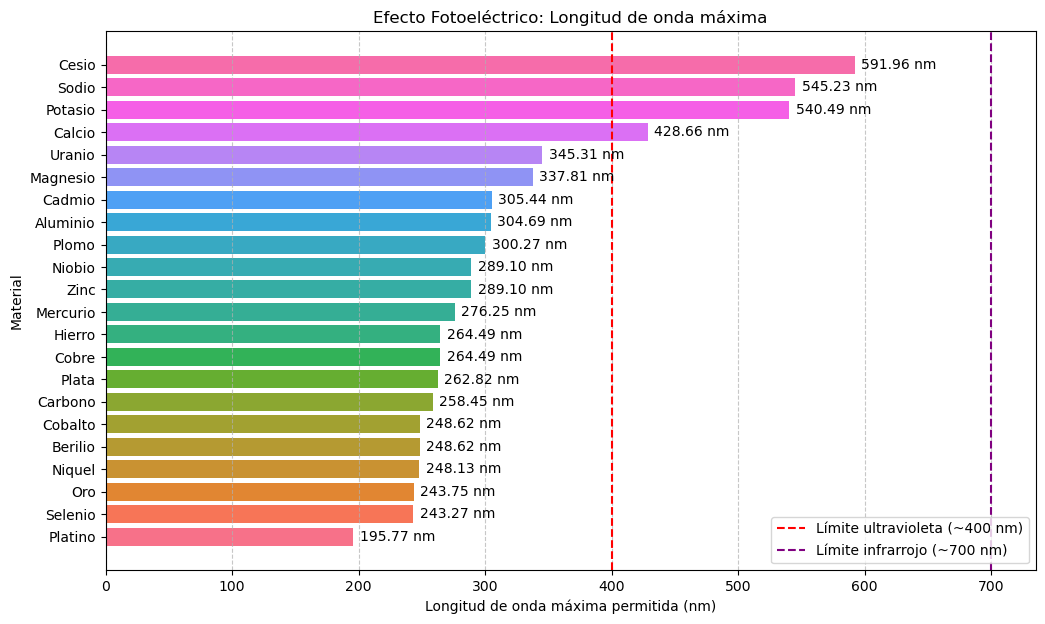

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes
h = 6.63e-34  # Constante de Planck (J·s)
c = 3.0e8     # Velocidad de la luz (m/s)
ev_to_j = 1.6e-19  # Conversión de eV a Joules

# Tabla de funciones de trabajo en eV
elementos = {
    "Aluminio": 4.08, "Berilio": 5, "Cadmio": 4.07, "Calcio": 2.9, "Carbono": 4.81,
    "Cesio": 2.1, "Cobalto": 5, "Cobre": 4.7, "Oro": 5.1, "Hierro": 4.7, "Plomo": 4.14,
    "Magnesio": 3.68, "Mercurio": 4.5, "Niquel": 5.01, "Niobio": 4.3, "Potasio": 2.3,
    "Platino": 6.35, "Selenio": 5.11, "Plata": 4.73, "Sodio": 2.28, "Uranio": 3.6, "Zinc": 4.3
}

# Calcular frecuencias y longitudes de onda
materiales = []
lambda_max_list = []

for elemento, fi_ev in elementos.items():
    Phi = fi_ev * ev_to_j  # Convertir función de trabajo a Joules
    lambda_max = (h * c) / Phi  # Longitud de onda máxima (m)
    
    materiales.append(elemento)
    lambda_max_list.append(lambda_max * 1e9)  # Convertimos a nm

# Ordenar por longitud de onda
sorted_indices = np.argsort(lambda_max_list)
materiales = np.array(materiales)[sorted_indices]
lambda_max_list = np.array(lambda_max_list)[sorted_indices]

# Generar colores aleatorios para cada material
num_materiales = len(materiales)
colors = sns.color_palette("husl", num_materiales)

# Graficar
plt.figure(figsize=(12, 7))
bars = plt.barh(materiales, lambda_max_list, color=colors)

# Agregar valores en las barras
for bar, lambda_max in zip(bars, lambda_max_list):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f"{lambda_max:.2f} nm", va='center', fontsize=10)

plt.axvline(x=400, color='red', linestyle='--', label='Límite ultravioleta (~400 nm)')
plt.axvline(x=700, color='purple', linestyle='--', label='Límite infrarrojo (~700 nm)')
plt.xlabel("Longitud de onda máxima permitida (nm)")
plt.ylabel("Material")
plt.title("Efecto Fotoeléctrico: Longitud de onda máxima")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
